In [1]:
import numpy as np
import pickle
import json
import os
import sys
import copy
import sklearn.preprocessing
import models
from sklearn.neighbors import NearestNeighbors
import utils
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../../data/fb15k/"
DUMP_FILE = "../dumps/fb15k_distmult_dump_norm.pkl"
MODEL_TYPE = "distmult"

In [3]:
train_data = utils.read_data(os.path.join(DATA_DIR,"train.txt"))
# dev_data = read_data(os.path.join(DATA_DIR,"valid.txt"))
# test_data = read_data(os.path.join(DATA_DIR,"test.txt"))

In [4]:
with open(DUMP_FILE,"rb") as f:
    dump = pickle.load(f)

In [5]:
dump.keys()

dict_keys(['tail_rel_type', 'entity_type', 'entity_to_id', 'head_rel_type', 'entity_real', 'rel_real', 'relation_to_id'])

## Mapping string to indexes

In [6]:
mapped_train_data = utils.map_data(train_data,dump)
# mapped_dev_data = map_data(dev_data)
# mapped_test_data = map_data(test_data)

In [7]:
index_head=utils.get_head_index(mapped_train_data)

In [8]:
print(len(index_head))

14834


## Length 2 Analysis

In [9]:
count_r1_r2,set_r1_r2=utils.get_r1r2_count(mapped_train_data,index_head,get_set=True)

In [10]:
print(len(count_r1_r2),len(set_r1_r2))

56863 56863


In [11]:
value_list=list(count_r1_r2.values())
# value_list=[len(x) for x in value_list]

In [12]:
cnt=Counter(value_list)

In [13]:
temp=Counter(value_list).most_common()

In [14]:
cnt=sorted(cnt.items())

In [15]:
array=np.array(cnt)
print(array.shape)

(3671, 2)


In [16]:
plt.plot(array[:,1])

KeyboardInterrupt: 

In [ ]:
plt.show()

In [ ]:
#y such (r1,r2) pairs in data that are seen x times - seen means (e1,r1,e3) (e3,r2,e2)

In [ ]:
temp=np.cumsum(array[:,1])/np.sum(array[:,1])

In [ ]:
# print(temp[0:10],array[:10,0])
print(array[temp[:]<0.5],temp[temp[:]<0.5])

## Length 1 analysis

In [22]:
relation_dict,_=utils.get_relation_dict(mapped_train_data)

In [23]:
value_list=list(relation_dict.values())
cnt=Counter(value_list)
cnt=sorted(cnt.items())
array=np.array(cnt)
print(array.shape)

(421, 2)


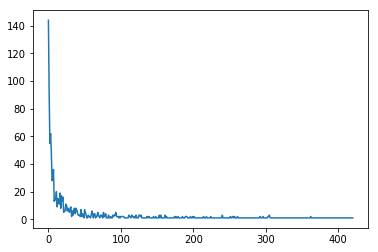

In [24]:
plt.plot(array[:,1])
plt.show()

In [ ]:
temp=np.cumsum(array[:,1])/np.sum(array[:,1])
print(array[temp[:]<0.5],temp[temp[:]<0.5])

[[  1 144]
 [  2  92]
 [  3  55]
 [  4  62]
 [  5  49]
 [  6  28]
 [  7  30]
 [  8  36]
 [  9  13]
 [ 10  15]
 [ 11  14]
 [ 12  20]
 [ 13   9]
 [ 14  15]
 [ 15  14]
 [ 16  11]
 [ 17  19]
 [ 18   8]
 [ 19  17]
 [ 20  13]] [ 0.1070632   0.17546468  0.21635688  0.26245353  0.29888476  0.3197026
  0.34200743  0.36877323  0.37843866  0.38959108  0.4         0.41486989
  0.42156134  0.43271375  0.44312268  0.45130112  0.46542751  0.47137546
  0.48401487  0.4936803 ]


## Length 3 analysis

In [ ]:
count_r1_r2_r3,set_r1_r2_r3=utils.get_r1r2r3_count(set_r1_r2,index_head,get_set=True)

In [ ]:
value_list=list(count_r1_r2_r3.values())
cnt=Counter(value_list)
cnt=sorted(cnt.items())
array=np.array(cnt)
print(array.shape)

In [ ]:
plt.plot(array[:,1])
plt.show()

In [20]:
count=0
print(count)
# for r1r2 in set_

0


In [22]:
for r1r2 in set_r1_r2:
    for e1e2 in set_r1_r2[r1r2]:
        count+=1
print(count)

81916109


In [24]:
avg=0
cnt=0
for u in index_head:
    avg+=len(index_head[u])
    cnt+=1
print(avg,cnt,avg*1.0/cnt)

483142 14834 32.569906970473234
